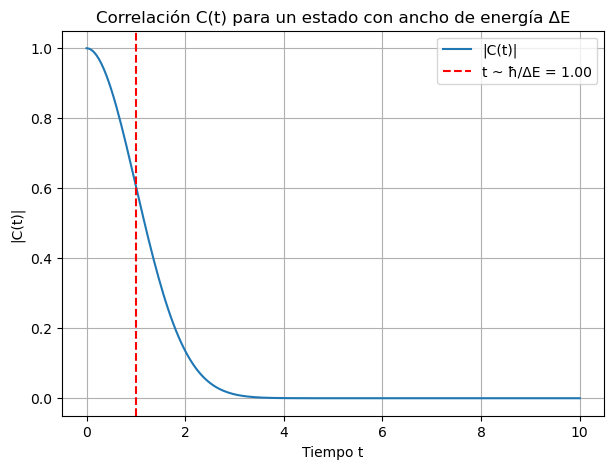

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# =======================================================
# Parámetros del problema
# =======================================================
hbar = 1.0       # Para simplificar, fijamos ħ = 1
E0 = 10.0        # Energía central
DeltaE = 1.0     # Ancho de energía (sigma = DeltaE)
NptsE = 1000     # Número de puntos para muestrear la integral en E
E_min = E0 - 5*DeltaE
E_max = E0 + 5*DeltaE

# Definimos un arreglo de tiempos y un arreglo de energías:
t_vals = np.linspace(0, 10, 200)    # Tiempos entre 0 y 10
E_vals = np.linspace(E_min, E_max, NptsE)

# Función de distribución p(E) (gaussiana normalizada)
def p_E(E, E0, sigma):
    norm = 1.0 / (np.sqrt(2*np.pi) * sigma)
    return norm * np.exp(-0.5 * ((E - E0)/sigma)**2)

# =======================================================
# Cálculo de C(t)
# =======================================================
C_t = np.zeros_like(t_vals, dtype=complex)

# Pre-cargamos p(E) para no recalcularlo cada vez:
p_vals = p_E(E_vals, E0, DeltaE)

# Para cada t, calculamos la integral numérica:
for i, t in enumerate(t_vals):
    # factor e^{- i (E - E0)t / hbar} en la integral
    phase = np.exp(-1j * (E_vals - E0) * t / hbar)
    integrand = p_vals * phase
    # Integramos con trapz (regla del trapecio)
    integral_val = np.trapz(integrand, E_vals)
    # Multiplicamos por e^{- i E0 t / ħ}
    C_t[i] = np.exp(-1j * E0 * t / hbar) * integral_val

# =======================================================
# Graficamos el resultado
# =======================================================
plt.figure(figsize=(7,5))

# Magnitud de C(t):
plt.plot(t_vals, np.abs(C_t), label="|C(t)|")

# Línea de referencia en t ~ ħ/ΔE:
tc = hbar / DeltaE
plt.axvline(tc, color='r', linestyle='--', 
            label=f"t ~ ħ/ΔE = {tc:.2f}")

plt.title("Correlación C(t) para un estado con ancho de energía ΔE")
plt.xlabel("Tiempo t")
plt.ylabel("|C(t)|")
plt.legend()
plt.grid(True)
plt.show()
